In [79]:
import numpy as np
import copy
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt

In [80]:
# Loading the train, test datasets and 

with h5py.File("./datas/test_catvnoncat.h5", "r") as f:
    testSetX = np.array(f["test_set_x"])
    testSetY = np.array(f["test_set_y"])
    classes = np.array(f["list_classes"][:])

with h5py.File("./datas/train_catvnoncat.h5", "r") as f:
    trainSetX = np.array(f["train_set_x"])
    trainSetY = np.array(f["train_set_y"])

numTrain = trainSetX.shape[0] # Number of trining data
numTest = testSetX.shape[0] # Number of test data
numPx = testSetX.shape[1] # Length of each image (Assuming rectangular images)

# Flatten the training and test sets
trainSetX = trainSetX.reshape((numTrain, -1)).T
testSetX = testSetX.reshape((numTest, -1)).T

# Standardize the datasets by deviding them to 255
trainSetX = trainSetX / 255.
testSetX = testSetX / 255.

In [85]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.
    return w, b

def propagate(w, b, X, Y):
    n,m = X.shape

    # Calculating the activation value
    Aa = sigmoid(np.dot(w.T, X)+b)
    # Calculate cost
    cost = -1/m*np.sum(Y*np.log(Aa)+(1-Y)*np.log(1-Aa))
    
    # Calculate gradients
    dw = 1/m*np.matmul(X,((Aa-Y).T))
    db = 1/m*np.sum(Aa-Y)

    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, maxIter=100, learningRate=0.009, printCost=False):
    # using gradient descent to optimize weights and bias
    costs = list()
    for i in range(maxIter):
        grads, cost = propagate(w,b,X,Y)

        w = w - learningRate * grads["dw"]
        b = b - learningRate * grads["db"]

        if i % 100 == 0:
            costs.append(cost)
            print(f"cost after iteration {i}: {cost}") if printCost else None

    params = {"w": w,
              "b": b}
    
    grads = {"dw": grads["dw"],
             "db": grads["db"]}
    
    return params, grads, costs

def predict(w, b, X):
    # Predict the product of an input with respect to trained weights and bias

    m = X.shape[1]
    pred = np.zeros((m,1))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        if A[0,i] > .5:
            pred[i] = 1
        else:
            pred[i] = 0
    return pred

def model(xTrain, yTrain, xTest, yTest, numIters = 2000, learningrate = .5, printCost = False):
    # Bundles all the functions necessary for a logistic regression model, gets 
    # the input and trains a simpel 1-layer network
    
    # Initialize the weights and bias
    w,b = initialize_with_zeros(xTrain.shape[0])

    params, grads, costs = optimize(w, b, xTrain, yTrain, numIters, learningrate, printCost)
    w = params["w"]
    b = params["b"]

    yPredTest = predict(w, b, xTest)
    yPredTrain = predict(w, b, xTrain)

    return{
        "costs": costs,
        "Y_prediction_test": yPredTest, 
        "Y_prediction_train" : yPredTrain, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learningrate,
        "num_iterations": numIters
    }



In [101]:
logisticRegression = model(trainSetX, trainSetY, testSetX, testSetY, printCost = True, numIters=2000, learningrate=0.005)

cost after iteration 0: 0.6931471805599453
cost after iteration 100: 0.5845083636993086
cost after iteration 200: 0.46694904094655476
cost after iteration 300: 0.37600686694802093
cost after iteration 400: 0.3314632893282512
cost after iteration 500: 0.30327306747438293
cost after iteration 600: 0.27987958658260487
cost after iteration 700: 0.2600421369258757
cost after iteration 800: 0.2429406846779662
cost after iteration 900: 0.22800422256726066
cost after iteration 1000: 0.2148195137844964
cost after iteration 1100: 0.20307819060644985
cost after iteration 1200: 0.19254427716706862
cost after iteration 1300: 0.18303333796883509
cost after iteration 1400: 0.17439859438448874
cost after iteration 1500: 0.16652139705400332
cost after iteration 1600: 0.15930451829756614
cost after iteration 1700: 0.15266732471296504
cost after iteration 1800: 0.14654223503982336
cost after iteration 1900: 0.14087207570310156


Cat


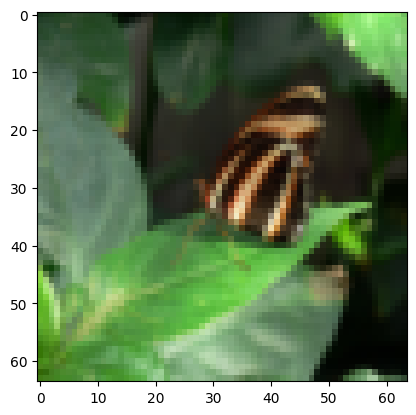

In [116]:
idx = 5
print("Cat") if logisticRegression["Y_prediction_test"][idx] == 1 else print("Not cat")
plt.imshow(testSetX[:,idx].reshape((-1,64,3)))
plt.show()

In [122]:
count = 0
for i in range(len(testSetY)):
    # print(i) if testSetY[i] != logisticRegression["Y_prediction_test"][i] else None
    if testSetY[i] != logisticRegression["Y_prediction_test"][i] :
        count = count + 1 
    

print(f"Predicted {len(testSetY) - count} of {len(testSetY)} right")

Predicted 35 of 50 right
